# Problem Statement

You are hired by a tour and travel agency which deals in selling df packages. You are provided details of 872 employees of a company. Among these employees, some opted for the package and some didn't. You have to help the company in predicting whether an employee will opt for the package or not on the basis of the information given in the data set. Also, find out the important factors on the basis of which the company will focus on particular employees to sell their packages.

In [99]:
 import numpy as np
import pandas as pd
import matplotlib.pyplot as plt   
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix

In [100]:
df=pd.read_csv("matches.csv")

### EDA

In [101]:
df.head(10)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,05/04/17,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,06/04/17,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,07/04/17,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,08/04/17,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,08/04/17,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
5,6,2017,Hyderabad,09/04/17,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong,NaN
6,7,2017,Mumbai,09/04/17,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN
7,8,2017,Indore,10/04/17,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,normal,0,Kings XI Punjab,0,8,AR Patel,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
8,9,2017,Pune,11/04/17,Delhi Daredevils,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Delhi Daredevils,97,0,SV Samson,Maharashtra Cricket Association Stadium,AY Dandekar,S Ravi,NaN
9,10,2017,Mumbai,12/04/17,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,JJ Bumrah,Wankhede Stadium,Nitin Menon,CK Nandan,NaN


In [90]:
df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
636,7894,2018,Mumbai,07/04/18,Mumbai Indians,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,1,DJ Bravo,Wankhede Stadium,Chris Gaffaney,A Nanda Kishore,Anil Chaudhary
637,7895,2018,Mohali,08/04/18,Delhi Daredevils,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,KL Rahul,"Punjab Cricket Association IS Bindra Stadium, ...",Rod Tucker,K Ananthapadmanabhan,Nitin Menon
638,7896,2018,Kolkata,08/04/18,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,4,SP Narine,Eden Gardens,C Shamshuddin,A.D Deshmukh,S Ravi
639,7897,2018,Hyderabad,09/04/18,Rajasthan Royals,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,S Dhawan,"Rajiv Gandhi International Stadium, Uppal",Nigel Llong,Vineet Kulkarni,O Nandan
640,7898,2018,Chennai,10/04/18,Kolkata Knight Riders,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,5,SW Billings,"MA Chidambaram Stadium, Chepauk",Anil Chaudhary,Chris Gaffaney,A Nanda Kishore


In [102]:
df.isna().sum()

id                   0
season               0
city                 0
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [103]:
df.drop('umpire1',axis=1,inplace=True)
df.drop('umpire2',axis=1,inplace=True)
df.drop('umpire3',axis=1,inplace=True)
df.drop('id',axis=1,inplace=True)
df.drop('season',axis=1,inplace=True)
df.drop('city',axis=1,inplace=True)
df.drop('date',axis=1,inplace=True)

In [104]:
def nans(df): return df[df.isnull().any(axis=1)]


In [105]:
nans(df)

,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
300,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla
545,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium
570,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium
744,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M. Chinnaswamy Stadium


In [106]:
df=df.dropna()

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 752 entries, 0 to 755
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   team1            752 non-null    object
 1   team2            752 non-null    object
 2   toss_winner      752 non-null    object
 3   toss_decision    752 non-null    object
 4   result           752 non-null    object
 5   dl_applied       752 non-null    int64 
 6   winner           752 non-null    object
 7   win_by_runs      752 non-null    int64 
 8   win_by_wickets   752 non-null    int64 
 9   player_of_match  752 non-null    object
 10  venue            752 non-null    object
dtypes: int64(3), object(8)
memory usage: 70.5+ KB


There are no missing values. 6 variables are numeric and remaining categorical. Categorical variables are not in encoded format

### Check for duplicate data

In [108]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
print(df.shape)

Number of duplicate rows = 0
(752, 11)


### Geting unique counts of all Objects

In [109]:
for feature in df.columns: 
    if df[feature].dtype == 'object': 
        print(feature)
        print(df[feature].value_counts())
        print('\n')
        

team1
Mumbai Indians                 101
Kings XI Punjab                 91
Chennai Super Kings             89
Royal Challengers Bangalore     83
Kolkata Knight Riders           83
Delhi Daredevils                70
Rajasthan Royals                67
Sunrisers Hyderabad             63
Deccan Chargers                 43
Pune Warriors                   20
Gujarat Lions                   14
Rising Pune Supergiant           8
Rising Pune Supergiants          7
Kochi Tuskers Kerala             7
Delhi Capitals                   6
Name: team1, dtype: int64


team2
Kolkata Knight Riders          95
Royal Challengers Bangalore    94
Delhi Daredevils               89
Mumbai Indians                 86
Kings XI Punjab                85
Rajasthan Royals               78
Chennai Super Kings            75
Sunrisers Hyderabad            45
Deccan Chargers                32
Pune Warriors                  25
Gujarat Lions                  16
Delhi Capitals                 10
Rising Pune Supergiant     

workclass, occupation,native-country has ?  
Since, high number of cases have ?, we will convert them into a new level

In [110]:
df.describe(include='all').transpose() 

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
team1,752,15,Mumbai Indians,101,NaN,NaN,NaN,NaN,NaN,NaN,NaN
team2,752,15,Kolkata Knight Riders,95,NaN,NaN,NaN,NaN,NaN,NaN,NaN
toss_winner,752,15,Mumbai Indians,98,NaN,NaN,NaN,NaN,NaN,NaN,NaN
toss_decision,752,2,field,460,NaN,NaN,NaN,NaN,NaN,NaN,NaN
result,752,2,normal,743,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dl_applied,752,NaN,NaN,NaN,0.025266,0.157036,0,0,0,0,1
winner,752,15,Mumbai Indians,109,NaN,NaN,NaN,NaN,NaN,NaN,NaN
win_by_runs,752,NaN,NaN,NaN,13.3537,23.5135,0,0,0,19,146
win_by_wickets,752,NaN,NaN,NaN,3.36835,3.38811,0,0,4,6,10
player_of_match,752,226,CH Gayle,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Checking for Outliers

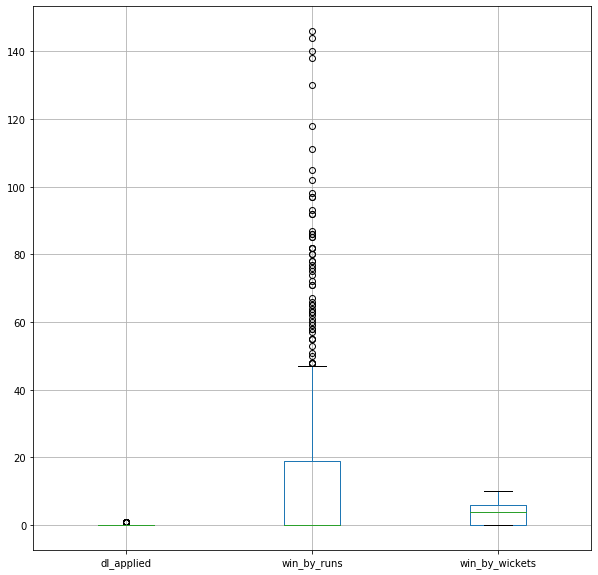

In [112]:
# construct box plot for continuous variables
plt.figure(figsize=(10,10))
df.boxplot()

### Treating Outliers

In [113]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [114]:
for column in df.columns:
    if df[column].dtype != 'object': 
        lr,ur=remove_outlier(df[column])
        df[column]=np.where(df[column]>ur,ur,df[column])
        df[column]=np.where(df[column]<lr,lr,df[column])

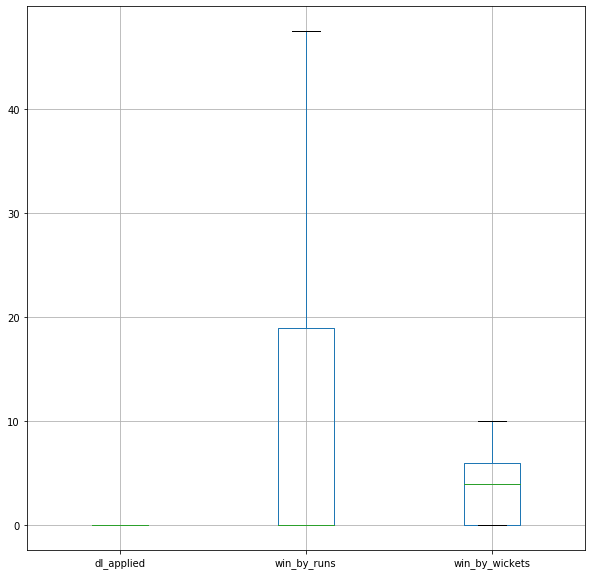

In [115]:
# construct box plot for continuous variables
plt.figure(figsize=(10,10))
df.boxplot()

### Checking for Correlations

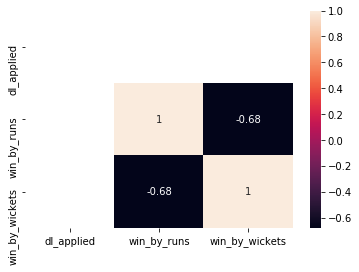

In [116]:
sns.heatmap(df.corr(), annot=True)

In [117]:
df.describe()

,dl_applied,win_by_runs,win_by_wickets
count,752.0,752.000000,752.000000
mean,0.0,10.914894,3.368351
std,0.0,15.953580,3.388114
min,0.0,0.000000,0.000000
25%,0.0,0.000000,0.000000
50%,0.0,0.000000,4.000000
75%,0.0,19.000000,6.000000
max,0.0,47.500000,10.000000


capital gain and capital loss are both 0 after removing outliers. These 2 variables can be dropped

There is hardly any correlation between the numeric variables

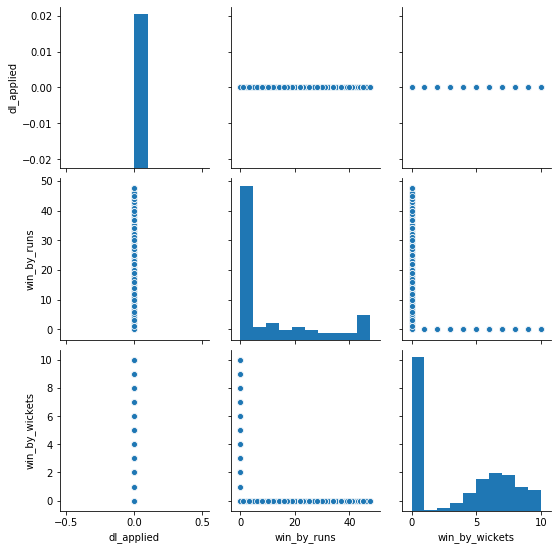

### Converting all objects to categorical codes

In [119]:
for feature in df.columns: 
    if df[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(df[feature].unique()))
        print(pd.Categorical(df[feature].unique()).codes)
        df[feature] = pd.Categorical(df[feature]).codes



feature: team1
['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions', 'Rising Pune Supergiant', 'Royal Challengers Bangalore', ..., 'Deccan Chargers', 'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants', 'Delhi Capitals']
Length: 15
Categories (15, object): ['Chennai Super Kings', 'Deccan Chargers', 'Delhi Capitals', 'Delhi Daredevils', ..., 'Rising Pune Supergiant', 'Rising Pune Supergiants', 'Royal Challengers Bangalore', 'Sunrisers Hyderabad']
[14  8  4 11 13  7  3  5  0 10  1  6  9 12  2]


feature: team2
['Royal Challengers Bangalore', 'Rising Pune Supergiant', 'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Daredevils', ..., 'Deccan Chargers', 'Pune Warriors', 'Kochi Tuskers Kerala', 'Rising Pune Supergiants', 'Delhi Capitals']
Length: 15
Categories (15, object): ['Chennai Super Kings', 'Deccan Chargers', 'Delhi Capitals', 'Delhi Daredevils', ..., 'Rising Pune Supergiant', 'Rising Pune Supergiants', 'Royal Challengers Bangalore', 'Sunrisers Hyderabad']
[13

In [120]:
df.head()

,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
0,14,13,13,1,0,0.0,14,35.0,0.0,224,28
1,8,11,11,1,0,0.0,11,0.0,7.0,199,21
2,4,7,7,1,0,0.0,7,0.0,10.0,34,31
3,11,5,5,1,0,0.0,5,0.0,6.0,61,13
4,13,3,13,0,0,0.0,13,15.0,0.0,99,17


RuntimeError: Selected KDE bandwidth is 0. Cannot estiamte density.

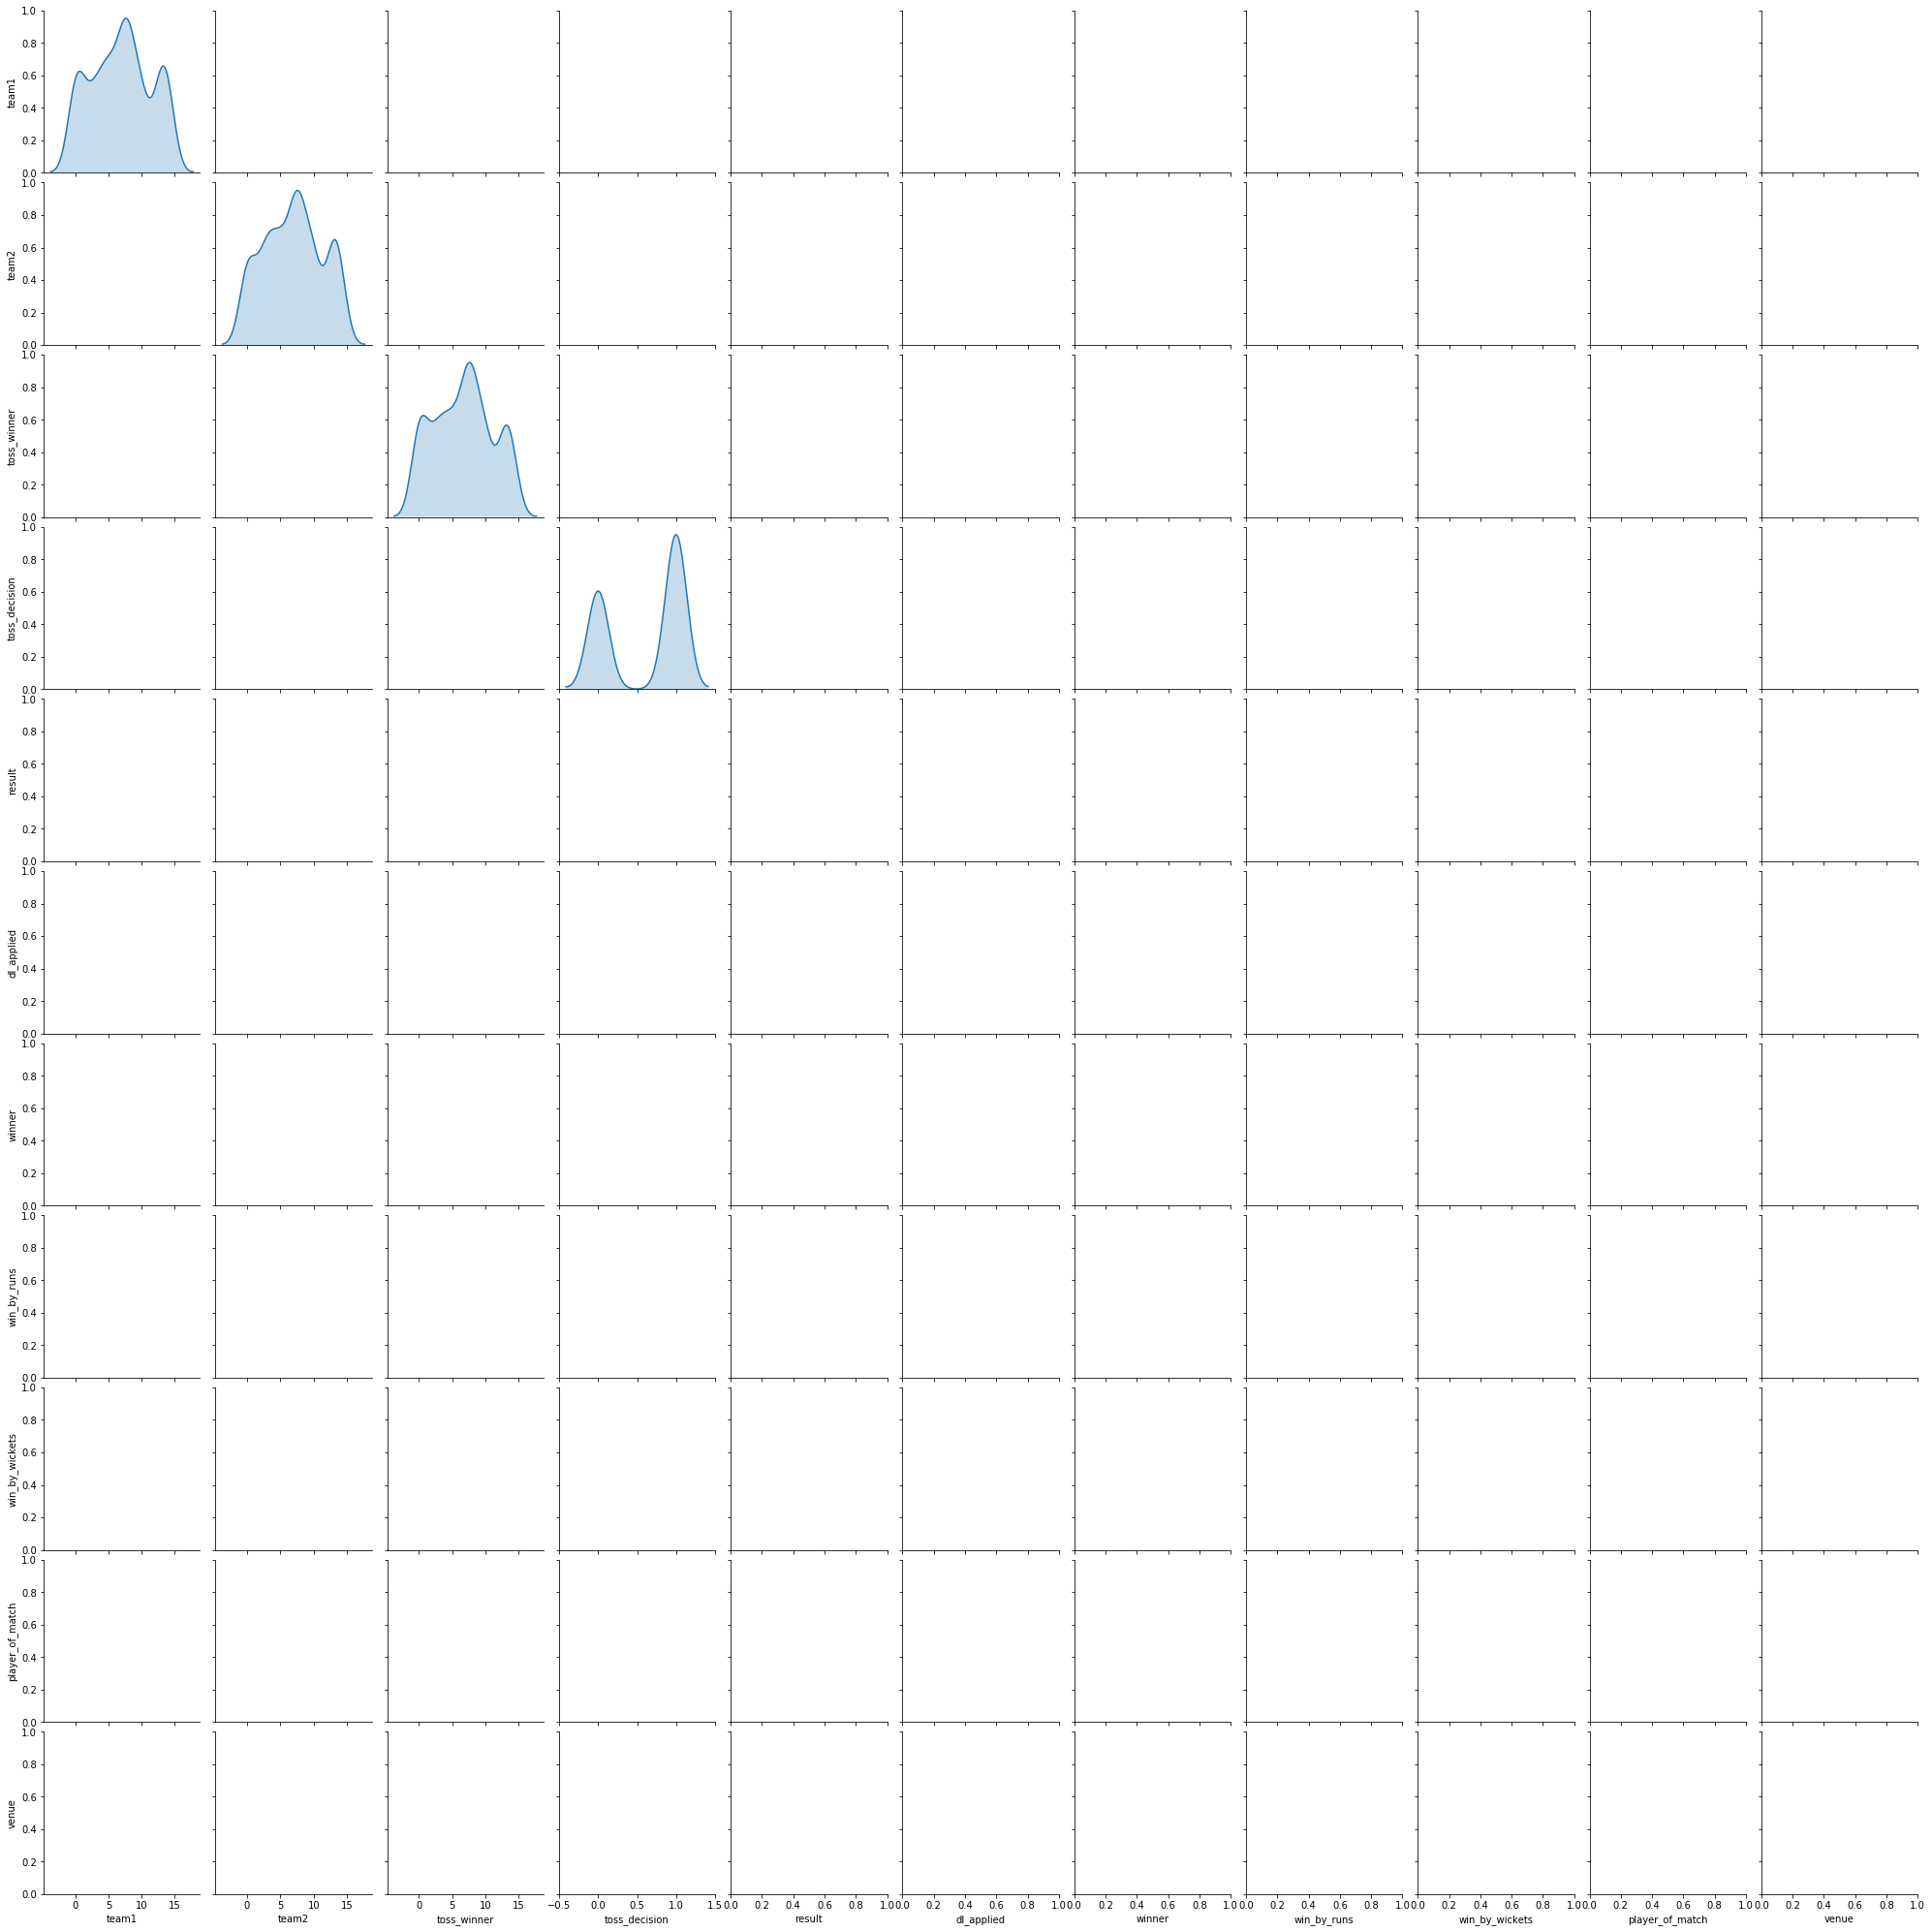

In [121]:
# Pairplot using sns
sns.pairplot(df,diag_kind='kde')

In [ ]:
sns.boxplot(df["result"],df["toss_decision"])

In [ ]:
sns.boxplot(df["Holliday_Package"],df["age"])

In [ ]:
sns.boxplot(df["Holliday_Package"],df["educ"])

In [ ]:
sns.boxplot(df["Holliday_Package"],df["no_young_children"])

In [ ]:
sns.boxplot(df["Holliday_Package"],df["no_older_children"])

In [ ]:
sns.boxplot(df["Holliday_Package"],df["foreign"])

In [ ]:
sns.countplot(df['foreign'],hue=df['Holliday_Package'])

In [ ]:
df=df.drop(columns="no_young_children",axis=1)

In [ ]:

df=df.drop(columns="no_older_children",axis=1)
df.head()

In [ ]:
plt.subplots(figsize=(10,10),)
sns.heatmap(df.corr(),annot=True)
plt.show()

### Train Test Split

In [122]:
# Copy all the predictor variables into X dataframe
X = df.drop('winner', axis=1)

# Copy target into the y dataframe. 
y = df['winner']

In [128]:
# Split X and y into training and test set in 75:25 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25 , random_state=1)

In [129]:
# invoke the LinearRegression function and find the bestfit model on training data
from sklearn.linear_model import LinearRegression

regModel= LinearRegression()
regModel.fit(X,y)

LinearRegression()

In [131]:
# Let us explore the coefficients for each of the independent attributes
for idx,col in enumerate(X_train.columns):
    print("The coefficient for "+col,regModel.coef_[idx])

The coefficient for team1 0.43136941900525344
The coefficient for team2 0.5568883603746356
The coefficient for toss_winner 0.03983396876914672
The coefficient for toss_decision 0.11829814754818753
The coefficient for result 0.33221835485361517
The coefficient for dl_applied -2.220446049250313e-16
The coefficient for win_by_runs -0.014891510535640133
The coefficient for win_by_wickets -0.0352659652702513
The coefficient for player_of_match -0.002164511767830656
The coefficient for venue 0.004707789429195367


In [132]:
intercept = regModel.intercept_

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 0.13587953800134933


In [133]:
regModel.score(X,y)


0.4748284909826477

In [135]:
regModel.intercept_

0.13587953800134933

In [136]:
regModel.score(X_test,y_test)


0.5471731177190879

In [137]:
predPrice=regModel.fit(X_train,y_train).predict(X_train)
mse=metrics.mean_squared_error(y_train,predPrice)
np.sqrt(mse)

3.26033087628579

In [138]:
#RMSE on Testing data
predPrice=regModel.fit(X_test,y_test).predict(X_test)
mse=metrics.mean_squared_error(y_test,predPrice)
np.sqrt(mse)


2.901175802511491

In [139]:
# concatenate X and y into a single dataframe
data_train=pd.concat([X_train,y_train],axis=1)
data_test=pd.concat([X_test,y_test],axis=1)

In [140]:
data_train.columns

Index(['team1', 'team2', 'toss_winner', 'toss_decision', 'result',
       'dl_applied', 'win_by_runs', 'win_by_wickets', 'player_of_match',
       'venue', 'winner'],
      dtype='object')

In [142]:
expr= 'winner ~ team1+team2+toss_winner+toss_decision+result+dl_applied+win_by_runs+win_by_wickets+player_of_match+venue'


In [143]:
import statsmodels.formula.api as smf
smlLinearModel=smf.ols(formula=expr,data=df).fit()
smlLinearModel.params

Intercept          1.358795e-01
team1              4.313694e-01
team2              5.568884e-01
toss_winner        3.983397e-02
toss_decision      1.182981e-01
result             3.322184e-01
dl_applied         1.180046e-15
win_by_runs       -1.489151e-02
win_by_wickets    -3.526597e-02
player_of_match   -2.164512e-03
venue              4.707789e-03
dtype: float64

In [144]:
print(smlLinearModel.summary())

                            OLS Regression Results                            
Dep. Variable:                 winner   R-squared:                       0.475
Model:                            OLS   Adj. R-squared:                  0.468
Method:                 Least Squares   F-statistic:                     74.54
Date:                Tue, 15 Sep 2020   Prob (F-statistic):           1.10e-97
Time:                        00:31:53   Log-Likelihood:                -1942.5
No. Observations:                 752   AIC:                             3905.
Df Residuals:                     742   BIC:                             3951.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.1359      0.495     

In [145]:
mse=np.mean(smlLinearModel.predict(data_train.drop('winner',axis=1))-data_train['winner']**2)

In [146]:
#Root Mean Squared Error - RMSE
predPrice=regModel.fit(X_test,y_test).predict(X_test)
mse=metrics.mean_squared_error(y_test,predPrice)
np.sqrt(mse)

2.901175802511491

In [147]:
np.sqrt(smlLinearModel.mse_resid) #another way

3.224901414416543

In [148]:
y_pred = smlLinearModel.predict(data_test)
y_pred

335     6.255407
268     3.958815
59     10.338904
721     3.872726
532     5.524908
         ...    
749    13.607347
741     7.741366
703    12.230086
354     5.033181
555     5.871556
Length: 188, dtype: float64

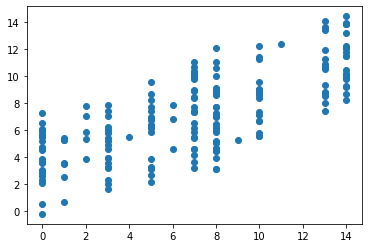

In [151]:
plt.scatter(y_test, y_pred)
plt.show()